# Display Dataset

This Notebook allows to visualize the reactions contained in the dataset, it also shows few "statistics" about it (nbr. of reactions, of reactants, ee distribution).

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import rdkit
from rdkit.Chem.AllChem import GetMorganGenerator
from rdkit.Chem import PandasTools
from utils import getMolFromSmile


In [12]:
#load the dataset, if not available, run process_database.py first

df_smile = pd.read_csv('dataset.csv')
df_smile.head(2)

,reactant_1,reactant_2,reactant_3,product_R,product_S,solvent,catalyst_1,catalyst_2,product_undesired_R,product_undesired_S,ee_R,ee_S,ee_undesired_R,ee_undesired_S,yield_undesired_R,yield_undesired_S,reaction,curated_catalyst_2
0,c1ccc(C(=O)CBr)cc1,Cc1cccc(C)n1,C#CCCCCC=O,C#CCCC[C@H](C=O)CC(=O)c1ccccc1,C#CCCC[C@@H](C=O)CC(=O)c1ccccc1,CN(C)C=O,C1COCCN1,F[P](F)(F)(F)(F)F.CC(C)(C)C1=CC=[N@H]2C(=C1)C3...,O=C[C@@H](CCCC1=CN(c2ccc(C(=O)OC[C@H](Cc3ccccc...,O=C[C@H](CCCC1=CN(c2ccc(C(=O)OC[C@H](Cc3ccccc3...,0.63,-0.63,0.0,0.0,0.095598,0.094402,C#CCCCCC=O.c1ccc(C(=O)CBr)cc1>C1COCCN1.F[P](F)...,F[P-](F)(F)(F)(F)F.CC(C)(C)C1=CC[N@H+]2C(=C1)C...
1,c1ccc(C(=O)CBr)cc1,Cc1cccc(C)n1,C#CCCCCC=O,C#CCCC[C@H](C=O)CC(=O)c1ccccc1,C#CCCC[C@@H](C=O)CC(=O)c1ccccc1,CN(C)C=O,C[Si](C)(C)OC(c1ccccc1)(c1ccccc1)[C@@H]1CCCN1,F[P](F)(F)(F)(F)F.CC(C)(C)C1=CC=[N@H]2C(=C1)C3...,O=C[C@@H](CCCC1=CN(c2ccc(C(=O)OC[C@H](Cc3ccccc...,O=C[C@H](CCCC1=CN(c2ccc(C(=O)OC[C@H](Cc3ccccc3...,44.66,-44.66,0.0,0.0,0.412281,0.157719,C#CCCCCC=O.c1ccc(C(=O)CBr)cc1>C[Si](C)(C)OC(c1...,F[P-](F)(F)(F)(F)F.CC(C)(C)C1=CC[N@H+]2C(=C1)C...


#### Dataset statistics

In [13]:
reactant_1_pool = df_smile['reactant_1'].unique()
catalyst_1_pool = df_smile['catalyst_1'].unique()
catalyst_2_pool = df_smile['curated_catalyst_2'].unique()

print(f'Number of reactions: {len(df_smile)}')
print(f'Number of reactants 1: {len(reactant_1_pool)}')
print(f'Number of reactants 2: {len(df_smile["reactant_2"].unique())}')
print(f'Number of reactants 3: {len(df_smile["reactant_3"].unique())}')
print(f'Number of solvents: {len(df_smile["solvent"].unique())}')
print(f'Number of catalysts 1: {len(catalyst_1_pool)}')
print(f'Number of catalysts 2: {len(catalyst_2_pool)}')
print(f'Number of products: {len(df_smile["product_R"].unique())}')
print(f'Number of undesired products: {len(df_smile["product_undesired_R"].unique())}')

print(f'Total combination count: {len(reactant_1_pool) * len(catalyst_1_pool) * len(catalyst_2_pool)}')

Number of reactions: 1430
Number of reactants 1: 10
Number of reactants 2: 1
Number of reactants 3: 1
Number of solvents: 1
Number of catalysts 1: 11
Number of catalysts 2: 13
Number of products: 10
Number of undesired products: 10
Total combination count: 1430


Notice that reactants 2 & 3 are the same accross all reactions, thus are not required for BO. Note also that combining all the conditions is equal to the number of reactions in the dataset, ineed those were high throughput experiments.

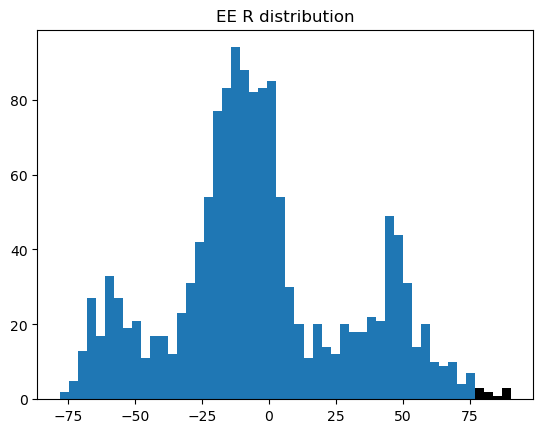

Q(99) 74.10400077819826 Nbr of reaction: 15
Q(90) 47.38999938964844
Q(75) 14.624999761581421
Q(50) -7.174999952316284
Mean -3.3437132836912165


In [14]:
#ee distribution

q99 = df_smile['ee_R'].quantile(0.99)

plt.title('EE R distribution')
n, bins, patch = plt.hist(df_smile['ee_R'], bins=50)
for p in patch:
    if p.get_x() < q99:
        pass
    else:
        p.set_facecolor('black')

plt.savefig('figures/ee_distribution.png', dpi=300)
plt.show()

print('Q(99)', df_smile['ee_R'].quantile(0.99), 'Nbr of reaction:', len(df_smile[df_smile['ee_R'] > q99]))
print('Q(90)', df_smile['ee_R'].quantile(0.90))
print('Q(75)', df_smile['ee_R'].quantile(0.75))
print('Q(50)', df_smile['ee_R'].quantile(0.50))
print('Mean', df_smile['ee_R'].mean())

Notice how most of the ee are negatives/close to zero (mean = -3.34), in this project, we aim the top hits, Q(99) which corresponds to an ee > 74. There are 15 hits there.

#### Display reactants & reactions

In [15]:
from rdkit.Chem import Draw

reactant_1_mols = [getMolFromSmile(smile) for smile in reactant_1_pool]
catalyst_1_mols = [getMolFromSmile(smile) for smile in catalyst_1_pool]
catalyst_2_mols = [getMolFromSmile(smile) for smile in catalyst_2_pool]  

#### Reactants 1

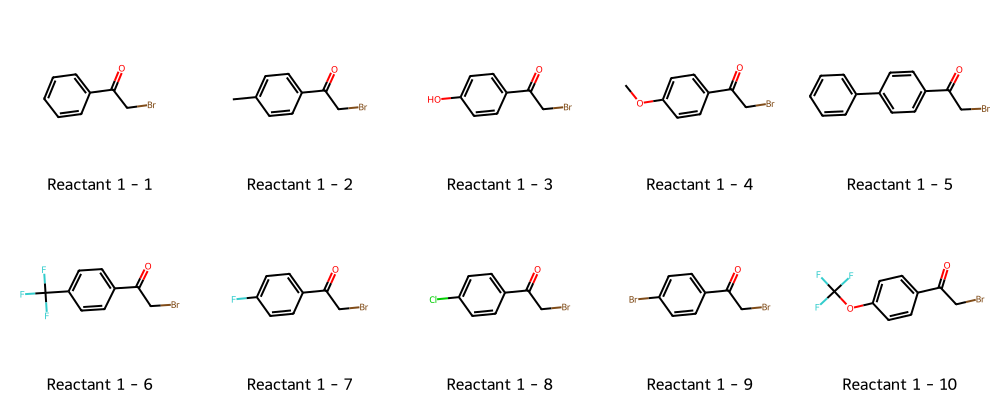

In [16]:
Draw.MolsToGridImage(reactant_1_mols,molsPerRow=5,subImgSize=(200,200),legends=[f'Reactant 1 - {i+1}' for i in range(len(reactant_1_mols))])  

#### Catalysts 1

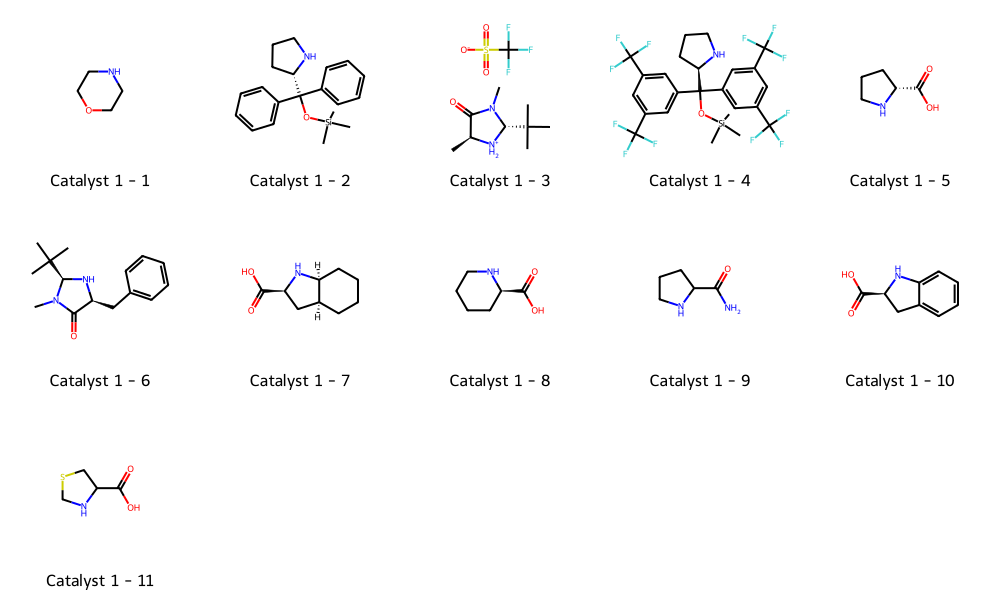

In [17]:
Draw.MolsToGridImage(catalyst_1_mols,molsPerRow=5,subImgSize=(200,200),legends=[f'Catalyst 1 - {i+1}' for i in range(len(catalyst_1_mols))])  

#### Catalysts 2

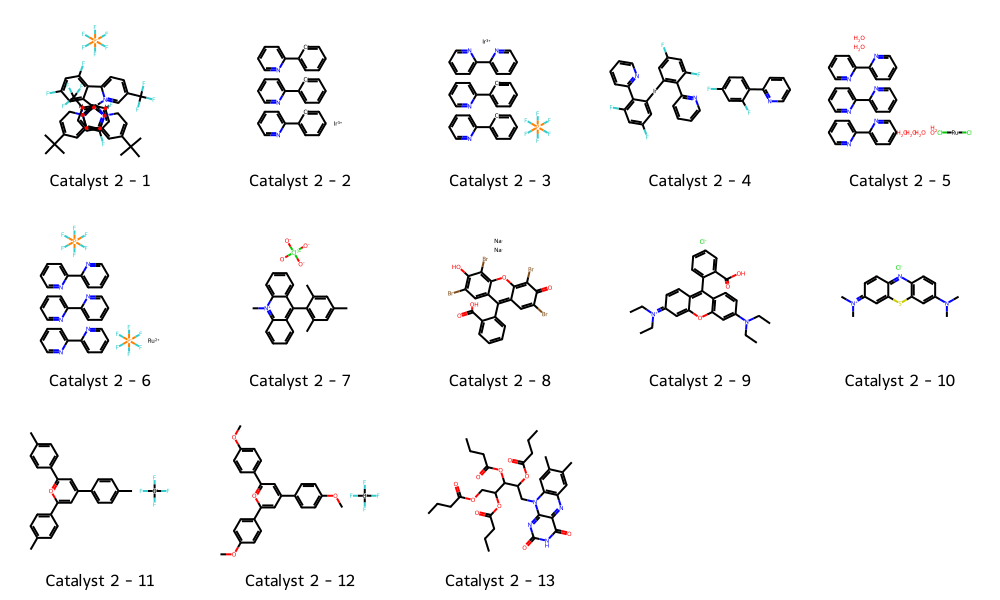

In [18]:
Draw.MolsToGridImage(catalyst_2_mols,molsPerRow=5,subImgSize=(200,200),legends=[f'Catalyst 2 - {i+1}' for i in range(len(catalyst_2_mols))])  

#### Best performing reaction

,reactant_1,catalyst_1,curated_catalyst_2,product_R,ee_R,product_undesired_R,yield_undesired_R
156,,,,,90.449997,,0.295197

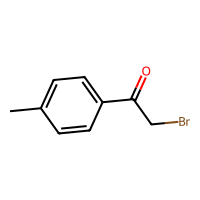
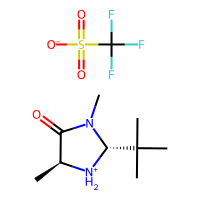
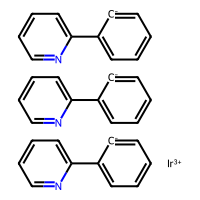
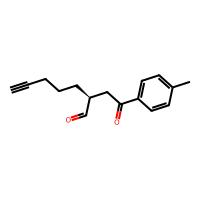
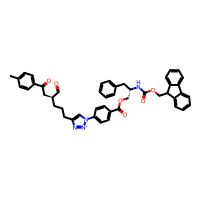

In [19]:
PandasTools.RenderImagesInAllDataFrames(images=True)

df_mol = df_smile.copy()

smile_columns = ['reactant_1','reactant_2', 'reactant_3', 'product_R', 'product_S', 'solvent', 'catalyst_1', 'curated_catalyst_2', 'product_undesired_R', 'product_undesired_S']


for smile_column in smile_columns:
  #The smiles that contains some errors are not sanitized to overcome the RDKit error.
  if smile_column =='catalyst_2' or smile_column =='product_undesired_R' or smile_column =='product_undesired_S':
    df_mol[smile_column] = df_mol[smile_column].apply(lambda x: getMolFromSmile(x, sanitize=False))

  else:
    df_mol[smile_column] = df_mol[smile_column].apply(getMolFromSmile)

print('WARNING: catalyst_2, product_undesired_R and product_undesired_S were not sanitized, i.e. some molecules may not be properly defined.')

df_mol = df_mol[['reactant_1', 'catalyst_1', 'curated_catalyst_2', 'product_R', 'ee_R', 'product_undesired_R', 'yield_undesired_R']]

best_reaction = df_mol[df_mol['ee_R'] == df_mol['ee_R'].max()]
best_reaction

#### Whole dataset

,reactant_1,catalyst_1,curated_catalyst_2,product_R,ee_R,product_undesired_R,yield_undesired_R
0,,,,,0.630000,,0.095598
1,,,,,44.660000,,0.412281
2,,,,,79.949997,,0.350902
3,,,,,-60.880001,,0.230808
4,,,,,-5.160000,,0.194422
...,...,...,...,...,...,...,...
1425,,,,,-15.680000,,0.261392
1426,,,,,-8.460000,,0.064078
1427,,,,,-15.590000,,0.122395
1428,,,,,-41.060001,,0.091357

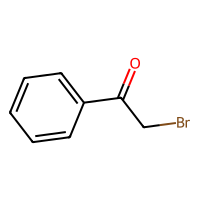
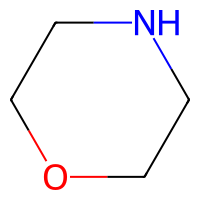
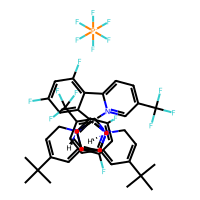
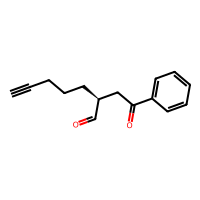
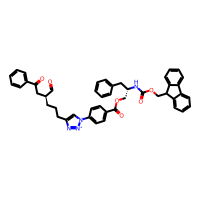
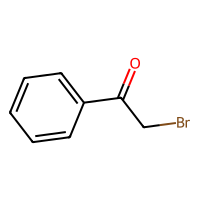
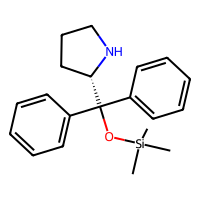
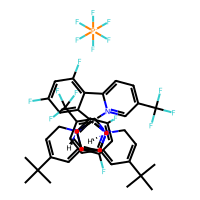
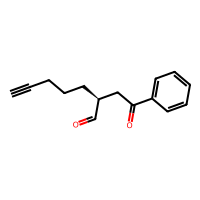
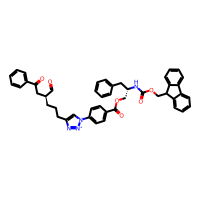
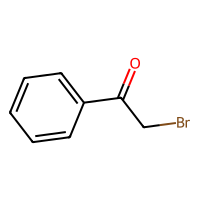
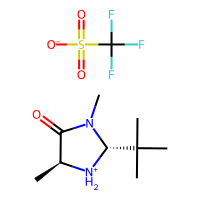
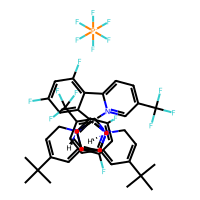
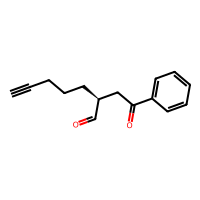
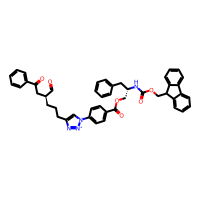
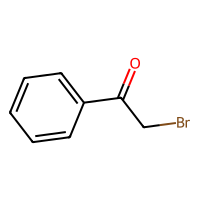
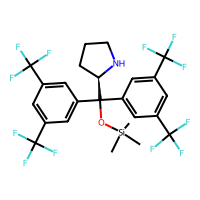
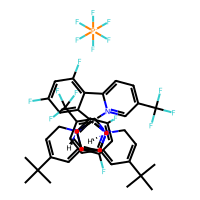
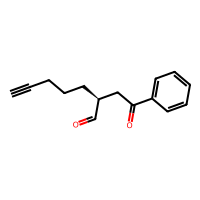
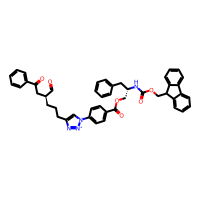
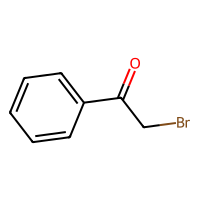
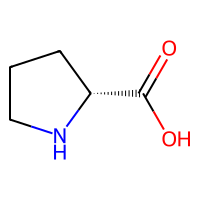
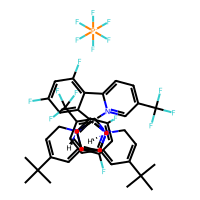
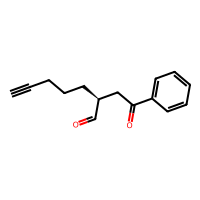
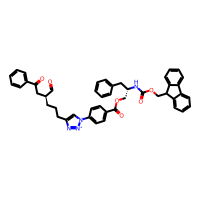
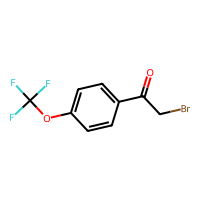
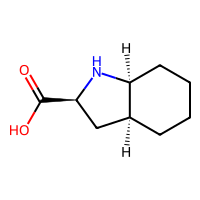
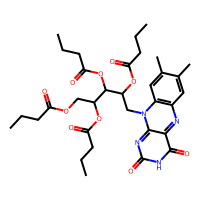
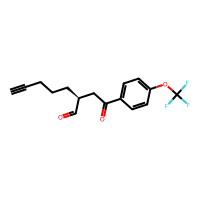
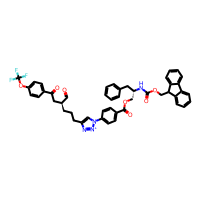
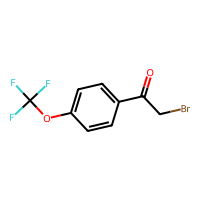
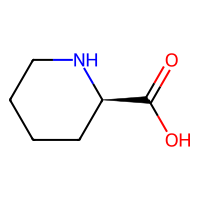
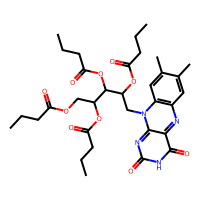
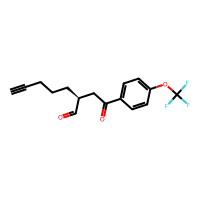
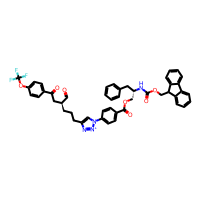
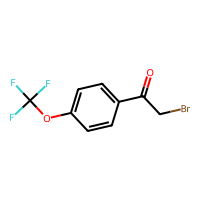
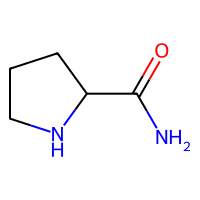
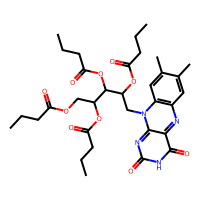
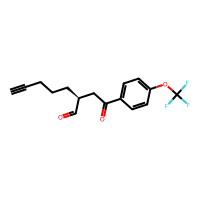
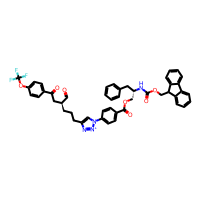
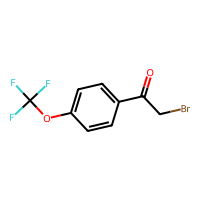
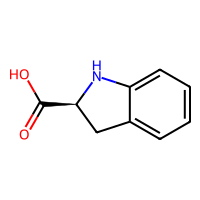
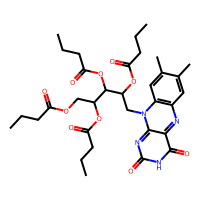
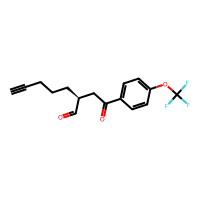
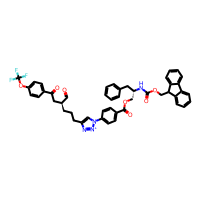
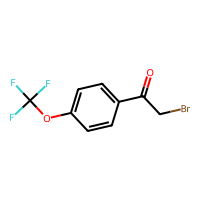
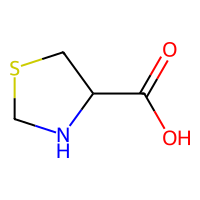
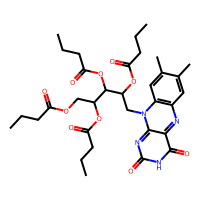
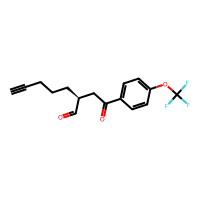
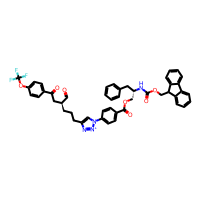

In [20]:
df_mol